<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>Data Mining(Project 1)</b>
<br>
<font size=5>
Implemented By: Rozhan Vassef
<br>
<font size=4> 2024
<hr>
</div>
</font>

<h2>
<font face="B Nazanin" color="black">
Importing Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To draw clearer graphs, uncomment the line below
# %config InlineBackend.figure_formats = ['svg']

<h2>
<font face="B Nazanin" color="black">
Loading The Dataset

In [8]:
data = pd.read_csv('apartment_rent.csv')
data.head()

,title,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,Thomas Ninke Senior Village,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1.547715e+09
1,"Average Rent $1,284 a month - That's a STEAL. ...","Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1.568758e+09
2,Super Cute! Apartment for Rent. $923/mo,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1.568744e+09
3,Apartment in move in condition in Loganville,NaN,2.0,4.0,No,Yes,NaN,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1.568777e+09
4,"$2,000 / Three BR - Great Deal. MUST SEE!","Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1.544237e+09


<h2>
<font face="B Nazanin" color="black">
Preprocessing
</font>
</h2>

<font face="B Nazanin" size=4 color="#0099cc">
-Print the data dimensions.
</font>
</p>



In [9]:
print(data.shape)

(11181, 15)


<font face="B Nazanin" size=4 color="#0099cc">
-Check for duplicate records in the dataset and remove them if necessary.
</font>
</p>

In [10]:
print('Number of duplicates:', data.duplicated().sum())

Number of duplicates: 2


In [11]:
data = data.drop_duplicates()
print(data.shape)

(11179, 15)


<font face="B Nazanin" size=4 color="#0099cc">
-For now the feature <code>title</code> doesn't have information value.Omit it.

</font>
</p>

In [12]:
data = data.drop('title', axis=1)
data.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,1.547715e+09
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,1.568758e+09
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,1.568744e+09
3,NaN,2.0,4.0,No,Yes,NaN,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,1.568777e+09
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,1.544237e+09


<font face="B Nazanin" size=4 color="#0099cc">
-Check for the missing values ​​in the data set.
</font>
</p>

In [13]:
print(data.isnull().sum())

amenities       1808
bathrooms          7
bedrooms          10
fee                0
has_photo          0
pets_allowed    6834
price              0
square_feet        0
cityname          30
state             30
latitude           3
longitude          3
source             0
time               1
dtype: int64


<h4>
<font face="B Nazanin" color="#0099cc">
<b>-Handling missing values</b>
</font>
</h4>
<font face="B Nazanin" size=4 color="#0099cc">
The column <code>amenities</code>which represents the amenities of homes, has a very large number of missing values.

For this particular feature, it is not possible to judge whether the values ​​are truly missing or whether no amenities were recorded for an ad.
However, replace missing values ​​for this property with the value <code>'none advertised'</code>.
<br>
The column <code>pets_allowed</code> has also a similar situation with the column <code>amenities</code>. Replace missing values ​​of this column with the default value <code>No</code>.  </font>
</p>

In [14]:
data['amenities'].fillna('none advertised', inplace=True)
data['pets_allowed'].fillna('No', inplace=True)

<ipython-input-14-1cfaac12540e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amenities'].fillna('none advertised', inplace=True)
<ipython-input-14-1cfaac12540e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

<font face="B Nazanin" size=4 color="#0099cc">

We want to fill in the missing values of the columns <code>bathrooms</code> and <code>bedrooms</code> with one of three statistical measures: mean, median, or mode.
<br>
</font>
</p>

<font face="B Nazanin" size=4 color="#0099cc">
Which statistical measure do you think is appropriate for filling in the missing values ​​in these columns? Why?
Then fill in the missing values ​​using the given measure.
<br>
</font>
</p>

In [15]:
median_bathrooms = data['bathrooms'].median()
data['bathrooms'].fillna(median_bathrooms, inplace=True)

mode_bedrooms = data['bedrooms'].mode()[0]
data['bedrooms'].fillna(mode_bedrooms, inplace=True)
#print(data.isnull().sum())

<ipython-input-15-51fa9a6be520>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(median_bathrooms, inplace=True)
<ipython-input-15-51fa9a6be520>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

<font face="B Nazanin">
<p align="justify">
<font size=4">
<b> <font color='#eb4034'> Explanation: </font></b>  
Due to the discrete nature of the data and the outliers for these two parameters, using the mean is not a good option.

To fill in the missing values, in the bathrooms column due to the presence of outliers, we use the median to achieve a more logical distribution. In the bedrooms column due to the discrete nature of the data and the higher repetition of some values, the mode is a more appropriate criterion.
</p>
</font>
</div>
</font>
<hr>

<font face="B Nazanin" size=4 color="#0099cc">

-After that,delete the lines having empty values of <code>cityname</code> or <code>latitude</code> or <code>price</code> .
</font>
</p>

In [16]:
data = data.dropna(subset=['cityname', 'latitude', 'price'])

<font face="B Nazanin" size=4 color="#0099cc">
-Now, if you have done the previous sections correctly, the dataframe should have 99399 rows and no missing values. Check the dataframe information with the <code>info()</code> method.
</font>
</p>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11149 entries, 0 to 11180
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     11149 non-null  object 
 1   bathrooms     11149 non-null  float64
 2   bedrooms      11149 non-null  float64
 3   fee           11149 non-null  object 
 4   has_photo     11149 non-null  object 
 5   pets_allowed  11149 non-null  object 
 6   price         11149 non-null  float64
 7   square_feet   11149 non-null  int64  
 8   cityname      11149 non-null  object 
 9   state         11149 non-null  object 
 10  latitude      11149 non-null  float64
 11  longitude     11149 non-null  float64
 12  source        11149 non-null  object 
 13  time          11148 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.3+ MB


<font face="B Nazanin" size=4 color="#0099cc">
-The attribute <code>time</code> is stored in Unix Time format, which is not a suitable data type for parsing other attributes based on date.
First, convert it to a suitable format.<br>

</font>
</p>

In [18]:
data['time'] = pd.to_datetime(data['time'], unit='s')
data.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,2019-01-17 08:57:33
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,2019-09-17 22:06:00
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,2019-09-17 18:16:11
3,none advertised,2.0,4.0,No,Yes,No,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,2019-09-18 03:23:23
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,2018-12-08 02:48:20


<font face="B Nazanin" size=4 color="#0099cc">
-Extract each of the day of the week, month, and year values ​​from the feature
<code>time</code> and place them in a separate column so that we can perform date-related analysis later.
<br>
Finally, delete the
<code>time</code>
column.

</font>
</p>

In [19]:
# extract the Year out of the date
data['year'] = data['time'].dt.year

# extract the month out of the date
data['month'] = data['time'].dt.month

# extract the day out of the date
data['day'] = data['time'].dt.day

# Drop the 'time' column
data.drop('time', axis=1, inplace=True)

data.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,year,month,day
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,2019.0,1.0,17.0
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,2019.0,9.0,17.0
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,2019.0,9.0,17.0
3,none advertised,2.0,4.0,No,Yes,No,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,2019.0,9.0,18.0
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,2018.0,12.0,8.0


<h4>
<font face="B Nazanin" color="#0099cc">
<b>Outlier data management</b>
</font>
</h4>

<font face="B Nazanin" size=4 color="#0099cc">
There may be houses that are too big or too expensive, or conversely, there may be houses that are too cheap or too small and far from the average. In some data analysis tasks, outliers can adversely affect the results.
For example, outliers can make graphs look misleading or incomprehensible, or they can mislead machine learning algorithms.
In this section, we will eliminate some houses that have one or more outliers or unusual characteristics.
</font>
</p>

<font face="B Nazanin" size=4  color="#0099cc">
One way to identify and eliminate outliers is to use quartiles and a box plot.
</p>
-So first draw a box plot of the price column.
</font>
</p>

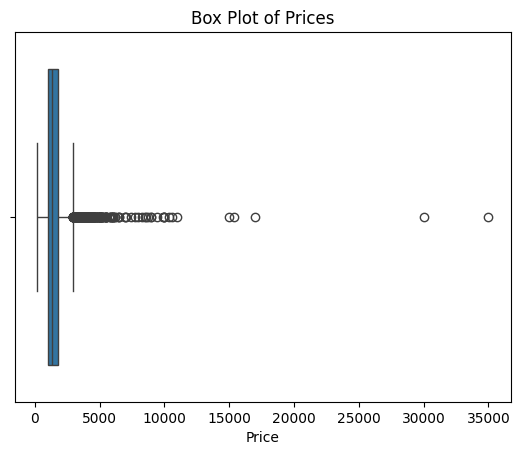

In [20]:
plt.figure()
sns.boxplot(x=data['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

<font face="B Nazanin" size=4 color="#0099cc">
If you have plotted the chart correctly, you will see that some of the data are so outliers that the box plot is out of the box! The points at the top of the chart are very outliers.
<br>
-Remove the outliers in the price column using the IQR method with a factor of 1.5 and redraw the box plot.
</font>
</p>


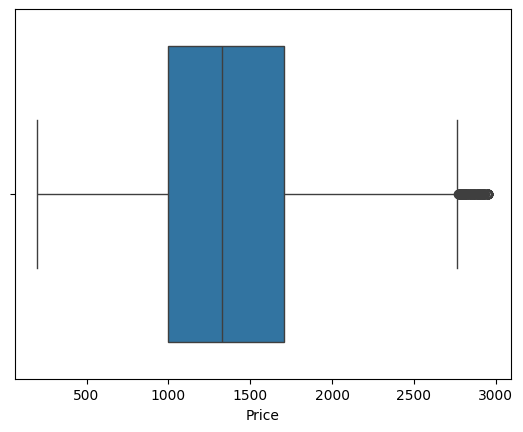

In [21]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

plt.figure()
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.show()

<font face="B Nazanin" size=4 color="#0099cc">
-Briefly explain how the IQR method works.
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4 >
<b> <font color='#eb4034'>
<b> <font color='#eb4034'> Explanation: </font></b>
: </font></b> The IQR method, in simple terms, is used to find data that is very different from the rest.
</p>
First, we divide the data into 4 parts:
</p>
Q1: The point below which 25% of the data are less than.
</p>
Q3: The point below which 75% of the data are less than.
</p>
Then we find the IQR value by subtracting Q1 from Q3.
</p>
To identify outliers, a range is determined:
</p>
Data that is much less than Q1−1.5×IQR or much more than Q3+1.5×IQR are considered outliers and can be removed.
</p>
</font>
</div>
</font>
<hr>

<h2>
<font face="B Nazanin" color="black">
Data Exploration
</font>
</h3>


<h4>
<font face="B Nazanin" color="#0099cc">
<b>1. Correlation </b>
</font>
</h4>
<font face="B Nazanin" size=4 color="#0099cc">
-Visualize the Correlation Matrix of the data in the form of a Heatmap.
</font>
</p>

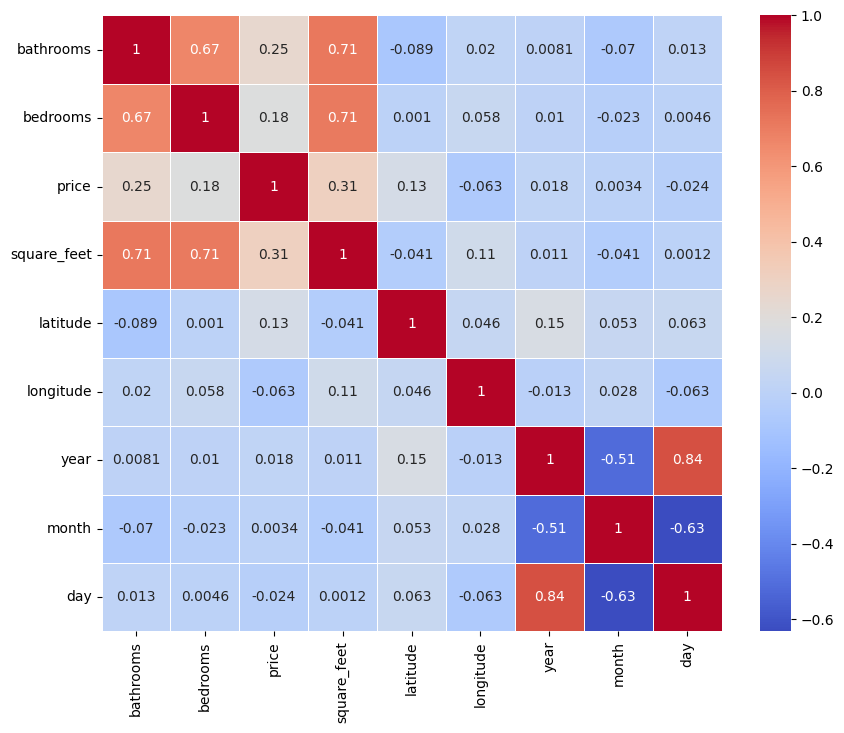

In [22]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


<font face="B Nazanin" size=4 color="#0099cc">
-Briefly explain the Heatmap chart and how it works.

-Also briefly describe your analysis of the features that had high correlations.
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'>
<b> <font color='#eb4034'> Explanation: </font></b>
: </font></b>  
<font size=4>
A Heatmap is a two-dimensional representation of data in which different values ​​are represented by colors. A simple heatmap provides a quick visual summary of information on two axes and allows users to quickly understand the most important or relevant data points.
</p>
Correlation Heatmap is a graphical tool that displays the correlation between multiple variables in a color-coded matrix. It is like a color chart that shows us how related the different variables are. Each variable is represented by a row and a column, and the cells represent the correlation between them. The color of each cell indicates the strength and direction of the correlation, with darker colors indicating a stronger correlation.
</p>
First, the values ​​on the diagonals all have the highest values ​​because they show the correlation between the same two characteristics. Apart from them, the correlation between the number of bathrooms and the number of bedrooms with a value of 0.67 is among the highest correlations because the values ​​of these two characteristics are usually close to each other, and in building a house, the number of bathrooms and rooms is generally considered proportional to each other.
</p>
Also, the correlation between the area of ​​the house with the number of bathrooms and the number of rooms is equal to 0.7 and 0.7, respectively, because bedrooms and bathrooms are among the main parts of any house and naturally their number affects the area of ​​the house.
</p>
</font>
</div>
</font>
<hr>

<h4>
<font face="B Nazanin" color="#0099cc">
<b>2. The infulence of (state) on (price)</b>
</font>
</h4>

<font face="B Nazanin" size=4 color="#0099cc">
In this dataset, the rental price and square footage of each house are specified,
but the rental price per square foot of the house is not specified.
</p>
-In the column
<code>pps</code>,
calculate and store the rental price of the houses per square foot.
</font>
</p>

In [23]:
data['pps'] = (data['price']/ data['square_feet'])
data.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,year,month,day,pps
0,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",337.0,617,Victoria,TX,28.696040,-97.164089,RentDigs.com,2019.0,1.0,17.0,0.546191
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,2019.0,9.0,17.0,1.763736
2,"Fireplace,Gym,Pool,Tennis,Washer Dryer",1.0,1.0,No,Thumbnail,"Cats,Dogs",923.0,510,Richmond,VA,37.530061,-77.476208,RentDigs.com,2019.0,9.0,17.0,1.809804
3,none advertised,2.0,4.0,No,Yes,No,1595.0,1950,Loganville,GA,33.795894,-83.877143,RentDigs.com,2019.0,9.0,18.0,0.817949
4,"Dishwasher,Garbage Disposal,Parking,Refrigerat...",2.0,3.0,No,Yes,"Cats,Dogs",2000.0,1600,Chicago,IL,42.005037,-87.681448,RentDigs.com,2018.0,12.0,8.0,1.250000


<font face="B Nazanin" size=4 color="#0099cc">
Now we want to examine the 10 states with the highest average rent price per square foot.
</p>
-Display these states in descending order of average rent price per square foot using a barplot.
</font>
</p>


<font face="B Nazanin" size=4 color="#0099cc">
You can use the <code>groupby</code> and <code>sort_values</code> functions.
</font>
</p>


<Axes: xlabel='cityname', ylabel='pps'>

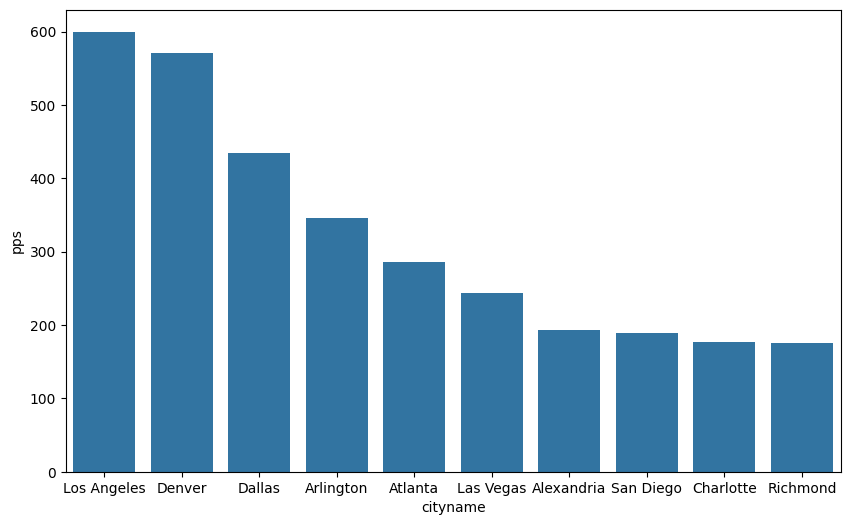

In [24]:
# Group the data by the labels and calculate the mean or sum (depending on your need)
grouped_data = data.groupby('cityname')['pps'].sum().reset_index()

# Sort the grouped data by the feature values
top_10_data = grouped_data.sort_values(by='pps', ascending=False).head(10)

# Plot the top n labels as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='cityname', y='pps', data=top_10_data)

<h4>
<font face="B Nazanin" color="#0099cc">
<b>3. The influence of (distance from the city center) on (price)</b>
</font>
</h4>

<font face="B Nazanin" size=4 color="#0099cc">
Next, we want to examine how the distance of a house from the city center affects the rental price per square foot of a house. For this, we will examine the city of Dallas.
</p>
-First, save the houses located in the city of Dallas in a new dataframe.
</font>
</p>

In [37]:
dallas =  data[data['cityname'] == 'Dallas']
dallas.head()

,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,year,month,day,pps
1,"Parking,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",1284.0,728,Dallas,TX,32.851338,-96.817635,RentDigs.com,2019.0,9.0,17.0,1.763736
23,"AC,Dishwasher,Fireplace,Gated,Gym,Patio/Deck,Pool",1.0,1.0,No,Thumbnail,"Cats,Dogs",890.0,558,Dallas,TX,32.867726,-96.806847,RentDigs.com,2019.0,9.0,17.0,1.594982
41,Pool,1.0,1.0,No,Thumbnail,No,1534.0,688,Dallas,TX,32.832278,-96.818930,RentDigs.com,2019.0,9.0,17.0,2.229651
71,"AC,Cable or Satellite,Dishwasher,Fireplace,Pat...",2.0,2.0,No,Thumbnail,"Cats,Dogs",860.0,945,Dallas,TX,32.799549,-96.709635,RentDigs.com,2019.0,9.0,17.0,0.910053
132,none advertised,2.0,2.0,No,Yes,No,1831.0,1076,Dallas,TX,32.934477,-96.849276,RentDigs.com,2019.0,9.0,17.0,1.701673


<font face="B Nazanin" size=4 color="#0099cc">
-Given the latitude and longitude of the houses and using a scatter plot, we can do the analysis.
The color of each dot should represent the rent per square foot of the house, and a color bar representing the average rent with a color spectrum should also be displayed next to the plot. The coordinates of downtown Dallas are given below. Also display the downtown area with a dot on the plot.
</font>
</p>


$$\text{latitude: } 32.77653 $$
$$\text{longitude: } -96.79708 $$

<font face="B Nazanin" size=4 color="#0099cc">
Since there are so many dots, it is better to set the dot size to 10 to display the dots better.
</font>
</p>


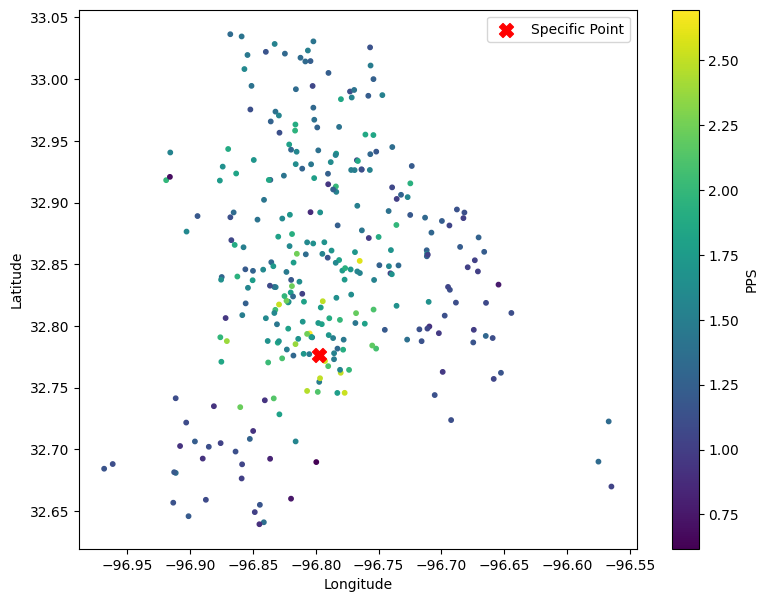

In [36]:
fig, ax = plt.subplots(figsize = (9, 7)) #use this figure and axis to draw plot

scatter = ax.scatter(dallas['longitude'], dallas['latitude'], c=dallas['pps'], s=10, cmap='viridis')

ax.scatter(-96.79708,32.77653, color='red', s=100, marker='X', label='Specific Point')

cbar = plt.colorbar(scatter)
cbar.set_label('PPS')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.legend()

plt.show()

<font face="B Nazanin" size=4 color="#0099cc">
-We can place a photo of this region of the world behind the plotted points to get a more realistic view of where the houses are located. Using the range of the horizontal and vertical axes of the graph, we have obtained the desired range using Google Maps, which is stored in the image <code>dallas.png</code>. Using the <code>imshow</code> method, we place this photo behind the graph.
</font>
</p>

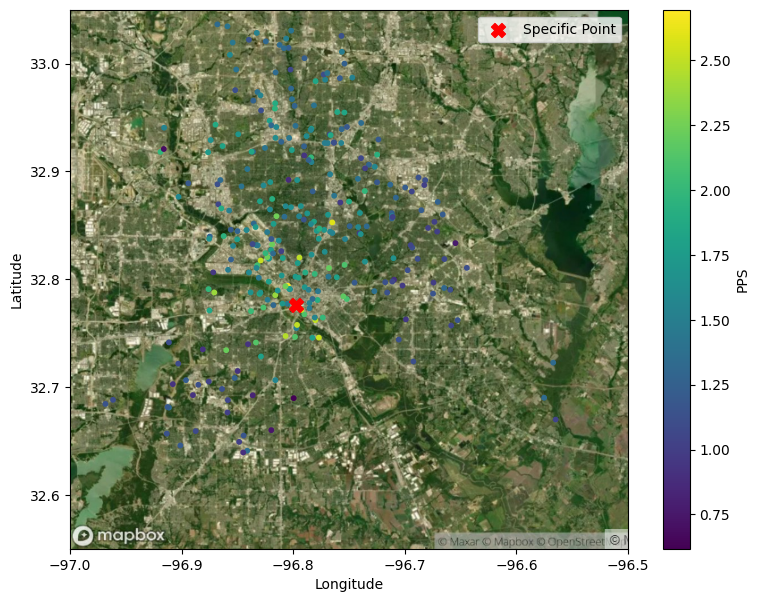

In [27]:
import matplotlib.image as mpimg
img = mpimg.imread('dallas.png')
ax.imshow(img, extent=[-97, -96.5, 32.55, 33.05], aspect='auto')
fig

<font face="B Nazanin" size=4 color="#0099cc">
-Write your opinion regarding the effect of the distance of the house from the city center on the rental price per square foot of the house.
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> Explanation: </font></b>  
As can be seen from the figure, the clusters of yellow dots, which indicate the highest pps or rental price per square foot, are mostly around the red dot or the city center, and the bold blue dots, which indicate the lowest rental price per square foot of the house, are mostly further away from the center. And it can be concluded that in general, houses that are closer to the city center have higher rental prices per square foot.
</p>
</font>
</div>
</font>
<hr>

<h4>
<font face="B Nazanin"  color="#0099cc">
<b>4. Relationship between (area) and (price)</b>
</font>
</h4>

<font face="B Nazanin" size=4  color="#0099cc">
-Use a joint plot to examine the relationship between house size and rental prices in Dallas.
</font>
</p>

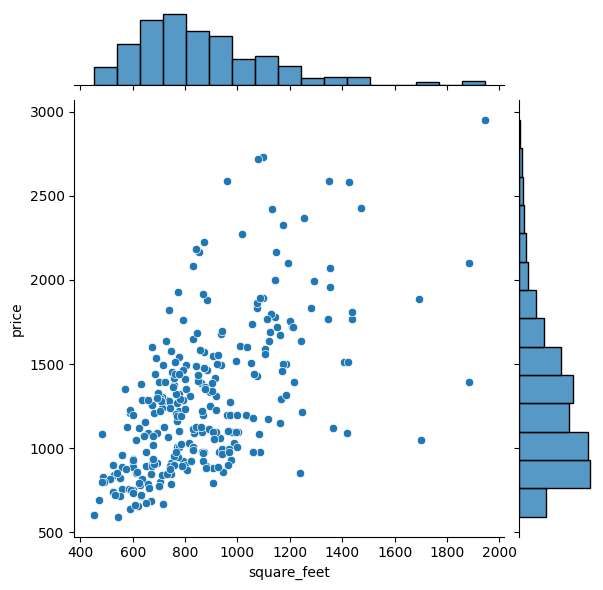

In [41]:
sns.jointplot(data=dallas, x='square_feet', y='price')
plt.show()

<font face="B Nazanin" size=4 color="#0099cc">
-What is your impression of the graph? Also explain how this graph is drawn and its applications.
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> Explanation: </font></b>
According to the chart, houses that are of normal size, that is, relatively small to medium size, are more popular because the majority of people are looking for a house with a normal size and a price that is commensurate with the normal size. In fact, according to the chart, houses with a relatively small to medium size and price are more numerous than other houses that, for example, have a very high or very low size and price.
</p>
</font>
</div>
</font>
<hr>

<h4>
<font face="B Nazanin" color="#0099cc">
<b>5. The infulence of (elevator) on (price)</b>
</font>
</h4>


<font face="B Nazanin" size=4 color="#0099cc">
In this section, we want to examine the effect of an elevator on the rental price of a house.
</p>
-Use the Kdeplot chart to examine the distribution of rental prices for houses with and without elevators.
<br>
The presence or absence of an elevator should be extracted from the <code>amenities</code> column. If a house has an elevator, the <code>amenities</code> column will contain the phrase <code>Elevator</code>.
</font>
</p>


<font face="B Nazanin" size=4 color="#0099cc">
Display the Kdeplot chart of both categories on one Axes.
</font>
</p>


<ipython-input-46-5660730fff2a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['amenities'].str.contains('Elevator')]['price'], label='Elevator', shade=True, color = 'purple')
<ipython-input-46-5660730fff2a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[~data['amenities'].str.contains('Elevator')]['price'], label='No Elevator', shade=True, color = 'green')


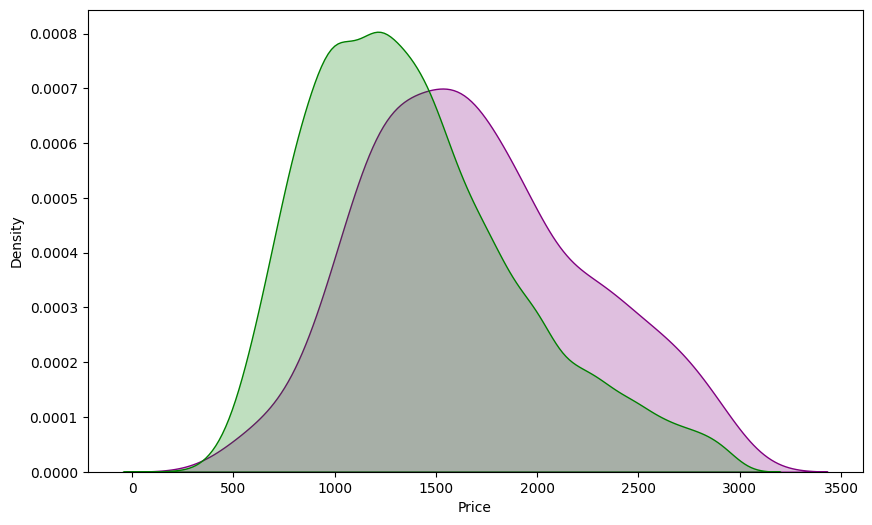

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=data[data['amenities'].str.contains('Elevator')]['price'], label='Elevator', shade=True, color = 'purple')
sns.kdeplot(data=data[~data['amenities'].str.contains('Elevator')]['price'], label='No Elevator', shade=True, color = 'green')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

<font face="B Nazanin" size=4  color="#0099cc">
-Write your opinion about the impact of elevators on house rental prices..
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> Explanation: </font></b>
Other factors being the same, having an elevator increases the price of a house, and from some point as prices increase, all houses will have elevators.
</p>
</font>
</div>
</font>
<hr>

<h4>
<font face="B Nazanin" color="#0099cc">
<b>6. Checking price distribution</b>
</font>
</h4>

<font face="B Nazanin" size=4 color="#0099cc">
In this section, we will examine the distribution of rental prices in the states of Washington and Texas.
</p>
-To do this, first save the houses located in these two states in a new dataframe and then display the distribution of rental prices for these two states with a violin plot.
</font>
</p>


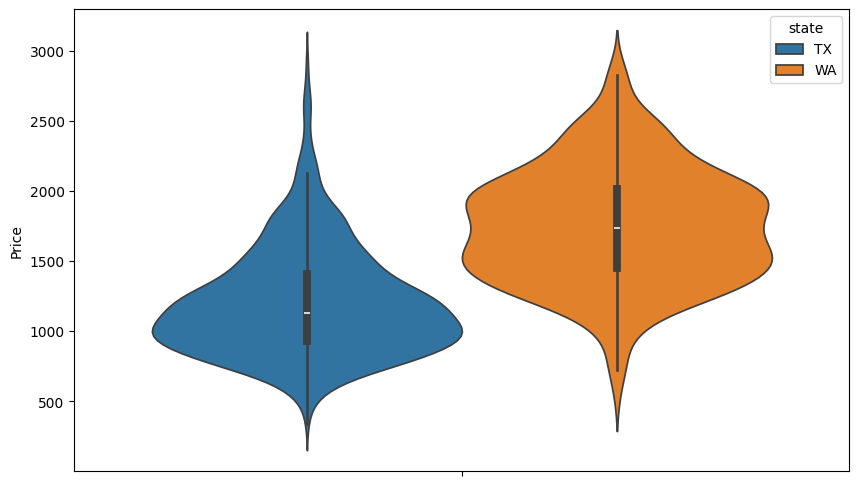

In [47]:
filtered_df = data[(data['state'] == 'WA') | (data['state'] == 'TX')]

fig, ax = plt.subplots(figsize=(10, 6)) #use this figure and axis to draw plot
sns.violinplot(data=filtered_df, y='price', hue='state', ax=ax)
plt.ylabel('Price')
plt.show()

<font face="B Nazanin" size=4 color="#0099cc">
-Write your analysis of the chart. Also explain when the Violin chart is appropriate for visual analysis.
</font>
</p>


<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> Explanation: </font></b>
The average home price in Texas is lower than the average home price in Washington.
</p>
Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group’s density curve can be compared to see where groups are similar or different.  
</p>
</font>
</div>
</font>
<hr>

<h4>
<font face="B Nazanin" color="#0099cc">
<b>7. The impact of standardization</b>
</font>
</h4>

<font face="B Nazanin" size=4 color="#0099cc">
In this section, we will examine the effect of standardization on features. The image below shows a scatterplot for the two features <code>price</code> and <code>bedrooms</code>.
As you can see, if we consider the range of the chart on both axes to be the same, no useful information can be extracted from the chart.
<br>
-Make a copy of the dataframe and standardize these two features in the new dataframe, and then redraw the chart.
</font>
</p>



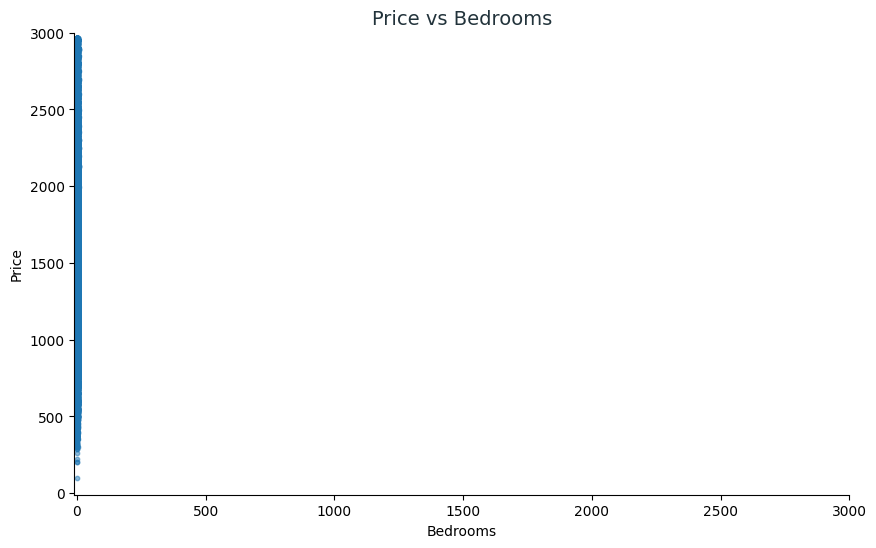

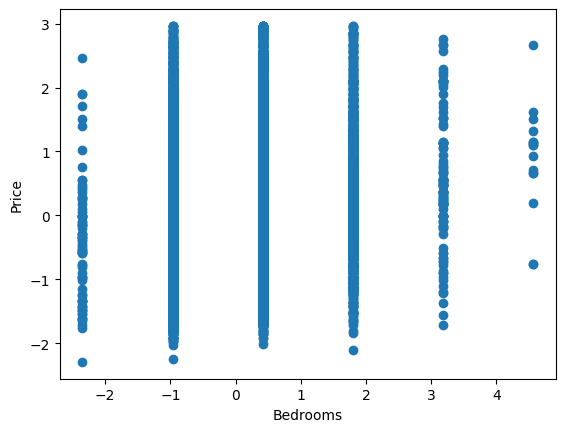

In [50]:
data_copy = data.copy()
attribute_price = data_copy['price']
attribute_bedrooms = data_copy['bedrooms']
data_copy['price'] = (attribute_price - attribute_price.mean()) / attribute_price.std()
data_copy['bedrooms'] = (attribute_bedrooms - attribute_bedrooms.mean()) / attribute_bedrooms.std()
plt.figure()
plt.scatter(data_copy['bedrooms'], data_copy['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

<font face="B Nazanin">
<p align="justify">
<font size=4>
<b> <font color='#eb4034'> Explanation: </font></b>
Standardizing features makes the data distribution more symmetrical and reduces scale differences. This improves the performance of machine learning algorithms because:convergence speed increases in gradient methods.
Model accuracy improves in distance-sensitive algorithms.
Large features do not dominate other features.(Also it should be mentioned that negative values mean the original values are below the mean, and
positive values mean the original values are above the mean.)
</p>
</font>
</div>
</font>
<hr>

<h2>
<font face="B Nazanin" color="#0099cc">
<b>8.kurtosis and skewness</b>

<font face="B Nazanin" size=4 color="#0099cc">
Read about the concepts of kurtosis and skewness in statistical distributions and answer the following two questions:
<ol>
<li>
What properties of a statistical distribution do these measures help to examine?
</li>
<li>
In the case of the normal distribution in particular, how can you identify the shape of the skewness of a graph without directly examining the graph and using simple statistical measures?
Based on this, guess the shape of the skewness of the <code>price</code> attribute and confirm your guess by drawing a graph.
</li>
</ol>
</font>
</p>


<font face="B Nazanin" size=4>
<b> <font color='#eb4034'> Explanation: </font></b>
</p>
Skewness: Indicates how blunt or sharp the distribution's peak is. Skewness greater than 3 means a distribution with a narrower peak and heavier tails than a normal distribution. Skewness less than 3 indicates that the distribution is relatively flatter.
</p>
Kurtosis: Indicates the symmetry or asymmetry of the distribution.
Positive kurtosis: The distribution is skewed to the right, with the right tail longer.
Negative kurtosis: The distribution is skewed to the left, with the left tail longer.
</font>
</p>

In [51]:
from scipy.stats import kurtosis, skew
print("skewness:", skew(data['price']))
print("kurtosis:", kurtosis(data['price']))

skewness: 0.6850991882619673
kurtosis: 0.030018505644212823


<font face="B Nazanin" size=4 color="#0099cc">
The price  kurtosis graph will most likely be a straight-line distribution with a long tail on the right.
To confirm this prediction, you can plot the price distribution graph.
This is because the skewness is less than zero, so the skewness is almost flat and the skewness is positive.
</font>
</p>


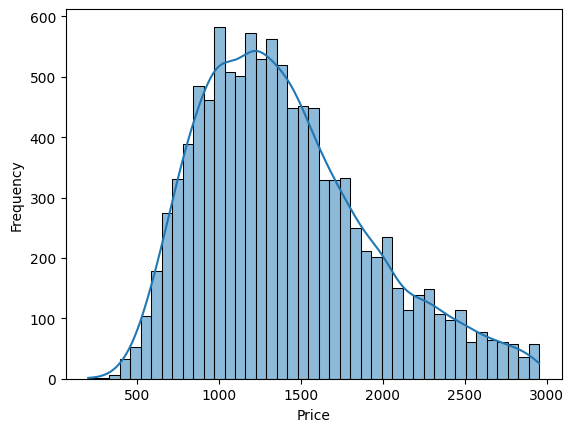

In [52]:
plt.figure()
sns.histplot(data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()